In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#S = concentração do substrato = Sf - S0 (g/litro) 
#X = concentração de massa celular (g/litro) 
#V = volume (litro)
#f_vol = fluxo volumétrico (dV/dt)

# parameter values

mumax = 0.20      # 1/hora #taxa máxima de crescimento específica
Ks = 1.00         # g/litro #constante de saturação
Yxs = 0.5         # g/g #coeficiente de rendimento (massa celular/massa do substrato limitante)
Ypx = 0.2         # g/g #coeficiente de rendimento (massa de produto formado/massa celular)
D = 0.50          # 1/hora #taxa de diluição = F(t)/V
S0 = 10.0         # g/litro #concentração do substrato de entrada
Sf = 20.0         # g/litro #concentração do substrato de saída

In [14]:
# definição de parâmetros

def mu(S):
    return mumax*S/(Ks + S)

def F(t):
    return 0.05

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# equações diferenciais

def xdot(x,t):
    X,P,S,V = x
    dX = Rg(X,S)-F(t)*X/V
    dP = Rp(X,S)-F(t)*P/V
    dS = F(t)*(S0 - Sf)/V - Rg(X,S)/Yxs
    dV = F(t)
    return [dX,dP,dS,dV]

def xdot2(x,t):
    X,P,S,V = x
    dX = Rg(X,S)-D*X
    dP = Rp(X,S)-D*P
    dS = D*(S0 - Sf) - Rg(X,S)/Yxs
    dV = F(t)
    return [dX,dP,dS,dV]


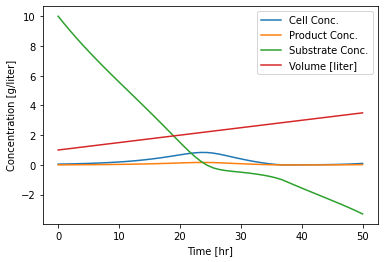

In [17]:
IC = [0.05, 0.0, 10.0, 1.0]

t = np.linspace(0,50)
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])



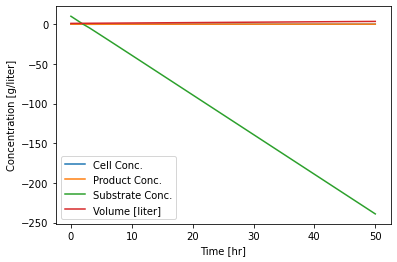

In [18]:
IC = [0.05, 0.0, 10.0, 1.0]

t = np.linspace(0,50)
sol2 = odeint(xdot2,IC,t)
X,P,S,V = sol2.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])